# MA
## Moving Averages


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a></strong><font color=black>(window)</font>&nbsp;&nbsp;
Provides rolling window calculations<br>
<strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html'>pandas.DataFrame.ewm</a></strong><font color=black>(span)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Provides exponential weighted functions</tt></div></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as st

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# SMA
## Simple Moving Average

In [6]:
df['6-month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()

In [7]:
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

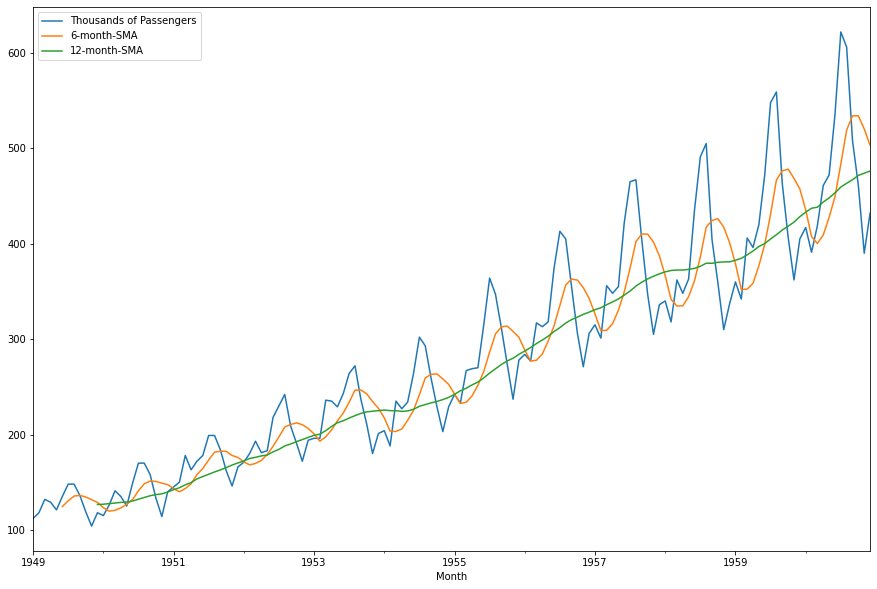

In [10]:
df.plot(figsize=(15,10));

# EWMA
## Exponentially Weighted Moving Average 

Basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

Provide exponential weighted (EW) functions.

Available EW functions: ``mean()``, ``var()``, ``std()``, ``corr()``, ``cov()``.

**Exactly one parameter: ``com``, ``span``, ``halflife``, or ``alpha`` must be
provided.**

Parameters
----------
**com :** float, optional
    Specify decay in terms of center of mass,
    :math:`\alpha = 1 / (1 + com)`, for :math:`com \geq 0`.
    
**span :** float, optional
    Specify decay in terms of span,
    :math:`\alpha = 2 / (span + 1)`, for :math:`span \geq 1`.
    
**halflife :** float, str, timedelta, optional
    Specify decay in terms of half-life,
    :math:`\alpha = 1 - \exp\left(-\ln(2) / halflife\right)`, for
    :math:`halflife > 0`.

    If ``times`` is specified, the time unit (str or timedelta) over which an
    observation decays to half its value. Only applicable to ``mean()``
    and halflife value will not apply to the other functions.

**alpha :** float, optional
    Specify smoothing factor :math:`\alpha` directly,
    :math:`0 < \alpha \leq 1`.
    
**min_periods :** int, default 0
    Minimum number of observations in window required to have a value
    (otherwise result is NA).
    
**adjust :** bool, default True
    Divide by decaying adjustment factor in beginning periods to account
    for imbalance in relative weightings (viewing EWMA as a moving average).

    - When ``adjust=True`` (default), the EW function is calculated using weights
      :math:`w_i = (1 - \alpha)^i`. For example, the EW moving average of the series
      [:math:`x_0, x_1, ..., x_t`] would be:

    .. math::
        y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ... + (1 -
        \alpha)^t x_0}{1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^t}

    - When ``adjust=False``, the exponentially weighted function is calculated
      recursively:

    .. math::
        \begin{split}
            y_0 &= x_0\\
            y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,
        \end{split}
        
**ignore_na :** bool, default False
    Ignore missing values when calculating weights; specify ``True`` to reproduce
    pre-0.15.0 behavior.

    - When ``ignore_na=False`` (default), weights are based on absolute positions.
      For example, the weights of :math:`x_0` and :math:`x_2` used in calculating
      the final weighted average of [:math:`x_0`, None, :math:`x_2`] are
      :math:`(1-\alpha)^2` and :math:`1` if ``adjust=True``, and
      :math:`(1-\alpha)^2` and :math:`\alpha` if ``adjust=False``.

    - When ``ignore_na=True`` (reproducing pre-0.15.0 behavior), weights are based
      on relative positions. For example, the weights of :math:`x_0` and :math:`x_2`
      used in calculating the final weighted average of
      [:math:`x_0`, None, :math:`x_2`] are :math:`1-\alpha` and :math:`1` if
      ``adjust=True``, and :math:`1-\alpha` and :math:`\alpha` if ``adjust=False``.
      
**axis :** {0, 1}, default 0
    The axis to use. The value 0 identifies the rows, and 1
    identifies the columns.
    
**times :** str, np.ndarray, Series, default None

    .. versionadded:: 1.1.0

    Times corresponding to the observations. Must be monotonically increasing and
    ``datetime64[ns]`` dtype.

    If str, the name of the column in the DataFrame representing the times.

    If 1-D array like, a sequence with the same shape as the observations.

    Only applicable to ``mean()``.

In [17]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

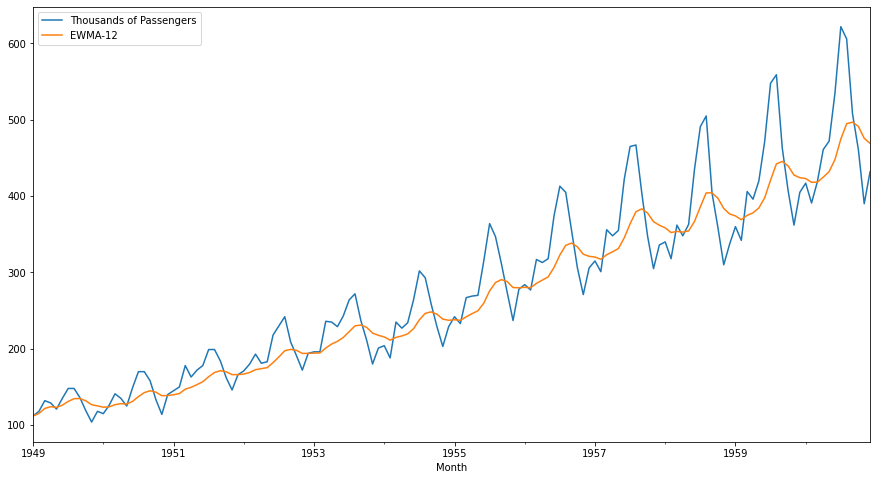

In [18]:
df[['Thousands of Passengers','EWMA-12']].plot(figsize=(15,8))

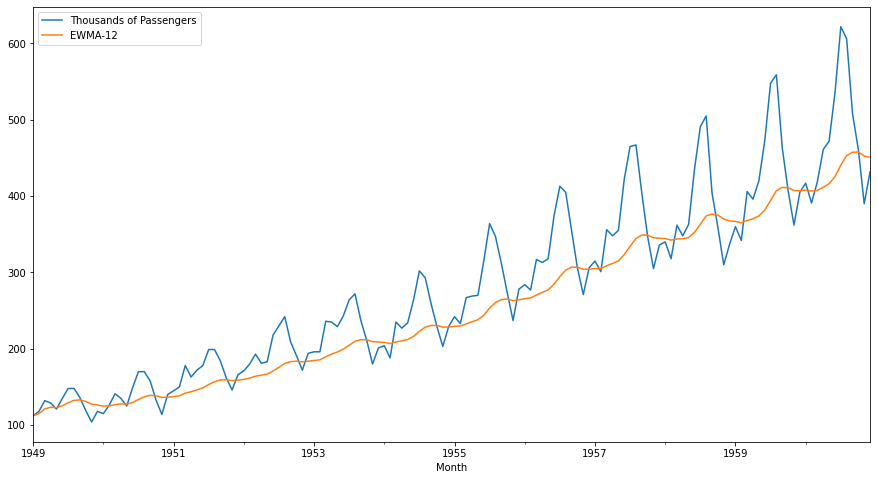

In [21]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(com=12).mean()
df[['Thousands of Passengers','EWMA-12']].plot(figsize=(15,8));

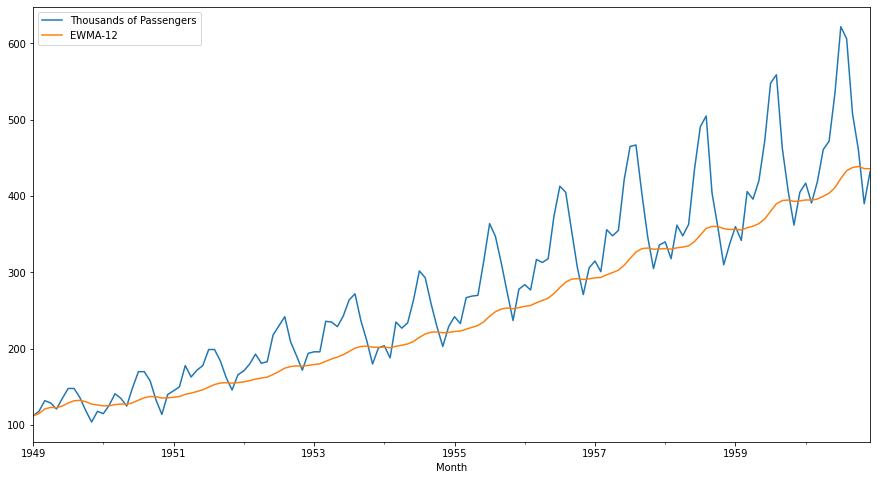

In [22]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(halflife=12).mean()
df[['Thousands of Passengers','EWMA-12']].plot(figsize=(15,8));

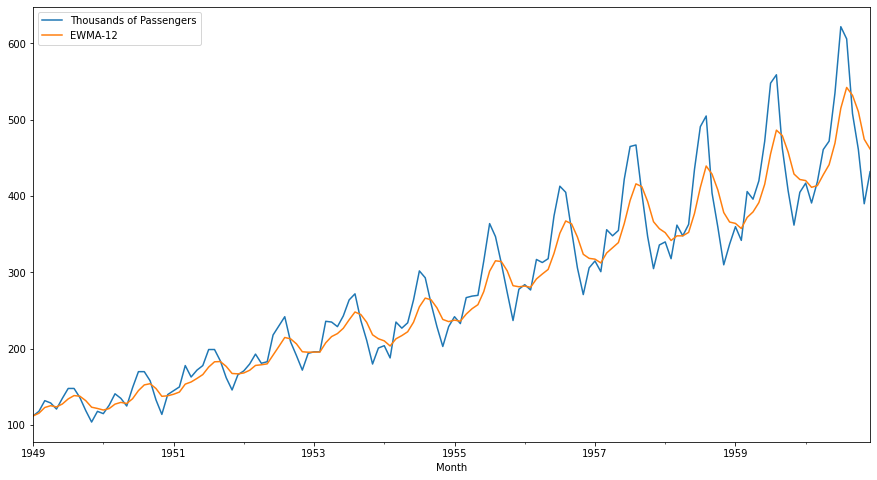

In [28]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(alpha=0.3).mean()
df[['Thousands of Passengers','EWMA-12']].plot(figsize=(15,8));